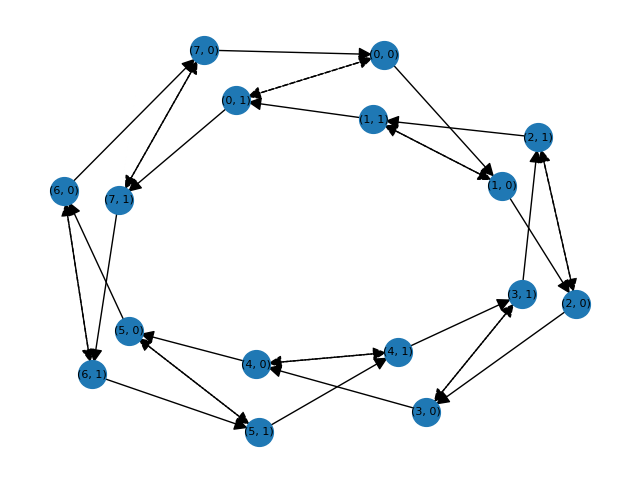

In [2]:

import itertools
import networkx as nx
import matplotlib.pyplot as plt

def make_Dn(n):
    # represent elements as pairs (k, f) with k in 0..n-1, f in {0,1}
    # multiplication: (k1,f1)*(k2,f2) = (k1 + (-1)^f1 * k2 mod n, f1 xor f2)
    elements = [(k,f) for k in range(n) for f in (0,1)]
    def mul(a,b):
        k1,f1 = a; k2,f2 = b
        k = (k1 + ((-1)**f1) * k2) % n
        f = f1 ^ f2
        return (int(k), f)
    r = (1,0)
    s = (0,1)
    gens = [('r', r), ('s', s)]
    return elements, mul, gens

def build_cayley_graph(elements, mul, gens):
    G = nx.DiGraph()
    for e in elements:
        G.add_node(e, label=f"{e}")
    for name,g in gens:
        for e in elements:
            target = mul(e, g)
            G.add_edge(e, target, label=name)
    return G

def draw_cayley(G):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8,6))
    nx.draw_networkx_nodes(G, pos, node_size=400)
    nx.draw_networkx_labels(G, pos, {n: str(n) for n in G.nodes()}, font_size=8)
    edges = list(G.edges(data=True))
    r_edges = [(u,v) for u,v,d in edges if d['label']=='r']
    s_edges = [(u,v) for u,v,d in edges if d['label']=='s']
    nx.draw_networkx_edges(G, pos, edgelist=r_edges, arrowsize=20)
    nx.draw_networkx_edges(G, pos, edgelist=s_edges, style='dashed', arrowsize=20)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    n = 8  # change to explore D_n
    elements, mul, gens = make_Dn(n)
    G = build_cayley_graph(elements, mul, gens)
    draw_cayley(G)

#What if we machine learn on cayley graphs? but what? 
#i.e. whether is a group or not? Classificaiton task? 


In [3]:
import sys, os
from pathlib import Path
import networkx as nx
from tqdm import tqdm

def parse_gap_output(fname):
    """Yield (meta, vertices, edgelist) tuples for each Cayley block."""
    with open(fname, 'r') as f:
        lines = iter(f.readlines())
    i = 0
    while True:
        try:
            line = next(lines)
        except StopIteration:
            break
        line = line.strip()
        if line.startswith("###CAYLEY START"):
            parts = [p.strip() for p in line.split("|")]
            meta = {
                'group_size': int(parts[1]),
                'group_name': parts[2],
                'gen_index': parts[3],
                'gens': parts[4] if len(parts) > 4 else ""
            }
    
            vline = next(lines).strip()
            assert vline.startswith("VERTICES:")
            verts = [int(x) for x in vline.split(":")[1].strip().split()]
            edges = []
            for el in lines:
                el = el.strip()
                if el == "###CAYLEY END":
                    break
                if el == "":
                    continue
                # each edge line: "u v"
                u,v = el.split()
                edges.append((int(u), int(v)))
            yield meta, verts, edges
        else:
        
            continue

ModuleNotFoundError: No module named 'tqdm'